In [1]:
import numpy as np
import pandas as pd

In [3]:
total_set = pd.read_csv("./train.csv", sep=",")
total_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
pd.read_csv("./test.csv", sep=",")

FileNotFoundError: [Errno 2] No such file or directory: './test.csv'

In [5]:
total_set = total_set.replace(to_replace='male', value="1")
total_set = total_set.replace(to_replace='female', value="0")
total_set = total_set.dropna(subset=['Age'])
total_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_set = total_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
result_set = total_set['Survived']

In [21]:
# Répartition Survived avant le train_test_split
result_set.value_counts(normalize=True)

0    0.593838
1    0.406162
Name: Survived, dtype: float64

### Découpage

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_set, result_set, 
    test_size=0.33, random_state=42)

In [25]:
#Q : Est-ce que la répartition initiale de Survived(0,1) sera conservée
#   au sein des sous échantillons, i.e avant et après le découpage?

#Avant: result_set => Y, ns avons 714 ind =>  0:424  (59.38)  et   1:290 (40.61)

#Après sans: y_train => 478 0(60.04) 1(39.95)  | y_test => 236 0(58.05)  1(41.94)

#Après avec: y_train => 478 0(59.41) 1(40.58)  | y_test => 236 0(59.32)  1(40.67)

y_trainf.value_counts(normalize=True), y_testf.value_counts(normalize=True)


(0    0.594142
 1    0.405858
 Name: Survived, dtype: float64,
 0    0.59322
 1    0.40678
 Name: Survived, dtype: float64)

In [26]:
x_trainf, x_test, y_train, y_test = train_test_split(train_set, result_set, 
    test_size=0.33, stratify= result_set,random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

In [28]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [29]:
predictions = knn1.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[84, 56],
       [60, 36]])

In [37]:
acc = conf_mat.diagonal().sum()/conf_mat.sum()

err = 1 - acc
print("taux d'erreur ", err)

taux d'erreur  0.4915254237288136


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predictions)

In [38]:
err_default = err
neighbors = range(2, 101)
errors = []
for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k) 	# n_jobs=-1
	knn.fit(x_train, y_train)
	err = round((1.0 - knn.score(x_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')


Results : knn = 2 => err_test = 41.525

Improvement of -41.03347457627118%



Results : knn = 3 => err_test = 44.492

Improvement of -44.00047457627118%



Results : knn = 4 => err_test = 42.797

Improvement of -42.30547457627118%



Results : knn = 5 => err_test = 42.373

Improvement of -41.88147457627118%



Results : knn = 6 => err_test = 42.373

Improvement of -41.88147457627118%



Results : knn = 7 => err_test = 44.068

Improvement of -43.57647457627118%



Results : knn = 8 => err_test = 44.915

Improvement of -44.42347457627118%



Results : knn = 9 => err_test = 47.034

Improvement of -46.54247457627118%



Results : knn = 10 => err_test = 44.492

Improvement of -44.00047457627118%



Results : knn = 11 => err_test = 45.763

Improvement of -45.27147457627118%



Results : knn = 12 => err_test = 42.797

Improvement of -42.30547457627118%



Results : knn = 13 => err_test = 47.034

Improvement of -46.54247457627118%



Results : knn = 14 => err_test = 43.644

Improvement of -43

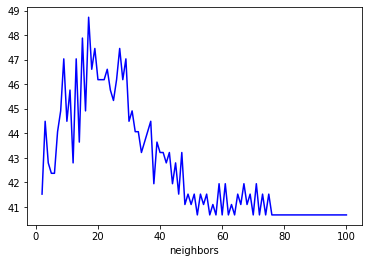

In [39]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')
plt.show()

In [44]:
pd.DataFrame({'k':range(2,101), 'errors':errors}).sort_values(['errors','k'],ascending=[True,True])

,k,errors
50,52,40.678
54,56,40.678
56,58,40.678
58,60,40.678
60,62,40.678
...,...,...
27,29,47.034
17,19,47.458
25,27,47.458
13,15,47.881


# Decision Boundaries

In [ ]:
#mlxtend